# HANC with a Welfare State

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize
from scipy.optimize import minimize_scalar
import copy
from copy import deepcopy

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import func


# Part I: Setting up and testing the model

In [2]:
# If new_output = True, all figures and tables will be exported
new_output = False

model = HANCWelfareModelClass(name='baseline')

par = model.par
ss = model.ss
sol = model.sol
path = model.path

In [3]:
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.S = 0.0
ss.Chi = 0.1
ss.G = 0.4

model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

household problem in ss solved in 0.1 secs [334 iterations]
household problem in ss simulated in 1.3 secs [403 iterations]


In [4]:
par.Chi_ = 0.0
par.G_ = 0.0
model.find_ss(do_print=True)

starting at [3.8624]

 message: The solution converged.
 success: True
  status: 1
     fun: [ 6.999e-13  0.000e+00]
       x: [ 3.673e+00  0.000e+00]
    nfev: 9
    fjac: [[-1.000e+00  0.000e+00]
           [ 0.000e+00 -1.000e+00]]
       r: [-8.480e+00 -2.748e+00  9.816e-01]
     qtf: [-6.223e-08  0.000e+00]

steady state found in 1.3 secs
ss.K =  3.389
ss.A_hh =  3.389
ss.L =  0.923
ss.Y =  1.363
ss.r =  0.021
ss.w =  1.034
ss.clearing_A = 7.00e-13
ss.clearing_L = 0.00e+00
ss.clearing_Y = 3.27e-11


In [5]:
model.test_path(in_place=True) 
model.compute_jacs(do_print=True)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             6.8e-10
 C_hh             2.0e-11
 ELL_hh           3.1e-11
 L_hh             2.6e-11
 INC_hh           1.2e-11
 U_hh             7.2e-07
blocks.market_clearing
 L                2.6e-11
 I                5.6e-17
 clearing_A       6.8e-10 [target]
 clearing_L       2.6e-11
 clearing_Y       2.0e-11
 clearing_G       0.0e+00 [target]
household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Chi             in 0.2 secs
curly_Y and curly_D calculated for S               in 0.2 secs
curly_Y and curly_D calculated for r               in 0.2 secs
curly_Y and curly_D calculated 

# Part II Question answers

### A Stationary Equalibrium without gov 

In [6]:
ss_res = {}

**A.1: Finding SS**

In [7]:
par.G_ = 0.0
par.Chi_ = 0.0
model.find_ss(do_print=False)

In [8]:
ss_res['Model A'] = func.table_ss(model)

**A.2: Ploting - Policy function**

Not exporting


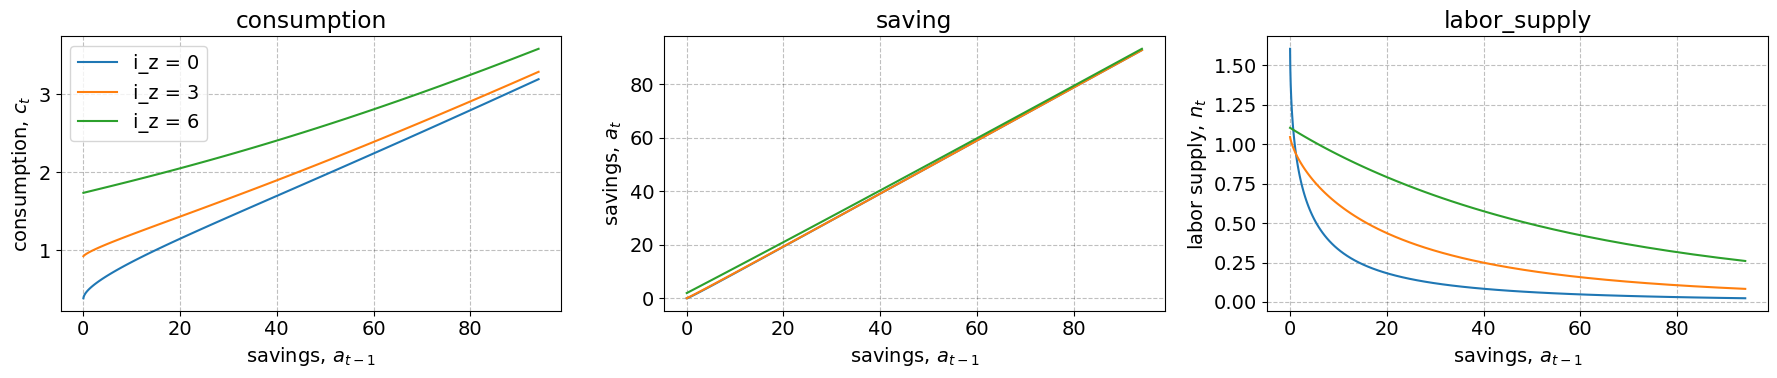

In [9]:
func.plot_policy(model, new_output=new_output)

**A.3: Ploting - Distribution in SS**

Not exporting


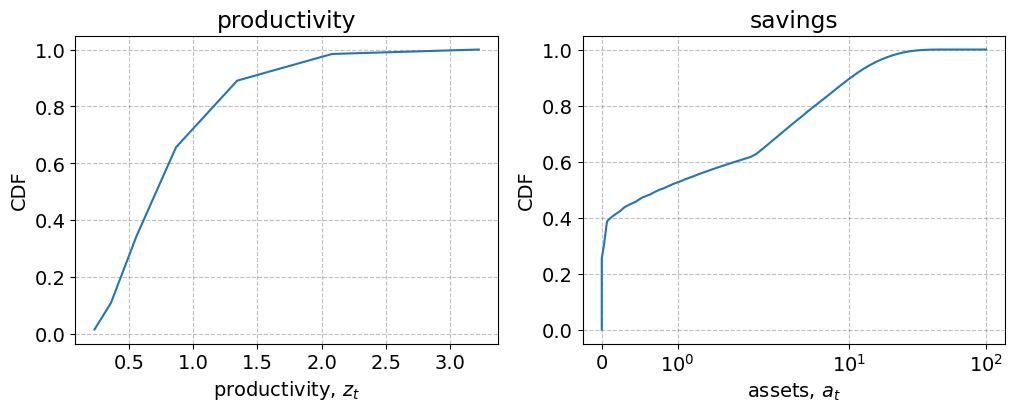

In [10]:
func.plot_cdf(model, new_output=new_output)

**A.4: Ploting - Expected discounted utility**

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             6.8e-10
 C_hh             2.0e-11
 ELL_hh           3.1e-11
 L_hh             2.6e-11
 INC_hh           1.2e-11
 U_hh             7.2e-07
blocks.market_clearing
 L                2.6e-11
 I                5.6e-17
 clearing_A       6.8e-10 [target]
 clearing_L       2.6e-11
 clearing_Y       2.0e-11
 clearing_G       0.0e+00 [target]
Utility: -100000001.6179
Not exported


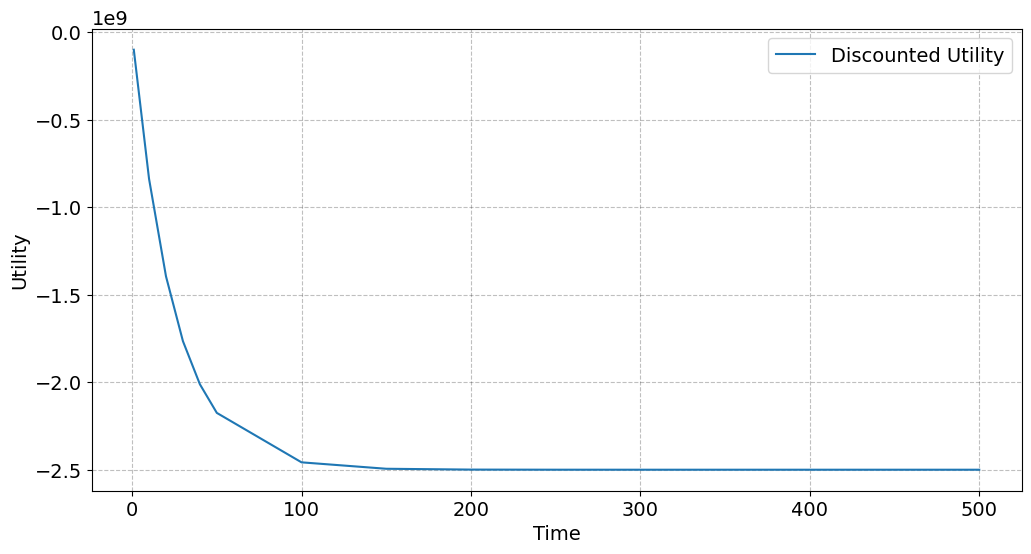

In [11]:
func.plot_utility(model, new_output= new_output)

# B. Optimal welfare policies 1 (no transfers)

In [12]:
table_res = {}

In [13]:
result_b = minimize_scalar(func.u_gov, bounds=(0.36, 0.475), method='bounded', args=(model))

func.u_gov(result_b.x, model)


ss_res['Model B'] = func.table_ss(model)

x_ = [result_b.x, 0.0]
table_res['Model B'] = func.table_extra(x_,model)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             8.8e-10
 C_hh             2.3e-11
 ELL_hh           9.8e-11
 L_hh             7.9e-11
 INC_hh           4.8e-12
 U_hh             2.1e-10
blocks.market_clearing
 L                7.9e-11
 I                1.1e-16
 clearing_A       5.1e-09 [target]
 clearing_L       7.9e-11
 clearing_Y       2.3e-11
 clearing_G       8.7e-10 [target]
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi      

In [14]:
chi_results = {}

In [15]:
chi_results['Model B'] = func.calc_chi(0.0, model, lists=True)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             8.8e-10
 C_hh             2.3e-11
 ELL_hh           9.8e-11
 L_hh             7.9e-11
 INC_hh           4.8e-12
 U_hh             2.1e-10
blocks.market_clearing
 L                7.9e-11
 I                1.1e-16
 clearing_A       5.1e-09 [target]
 clearing_L       7.9e-11
 clearing_Y       2.3e-11
 clearing_G       8.7e-10 [target]
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi      

In [16]:
print(f'G \/ Gamma at optimal level of government production')
print(chi_results['Model B']['Y_G_relatio'])

G \/ Gamma at optimal level of government production
0.38913908288038246


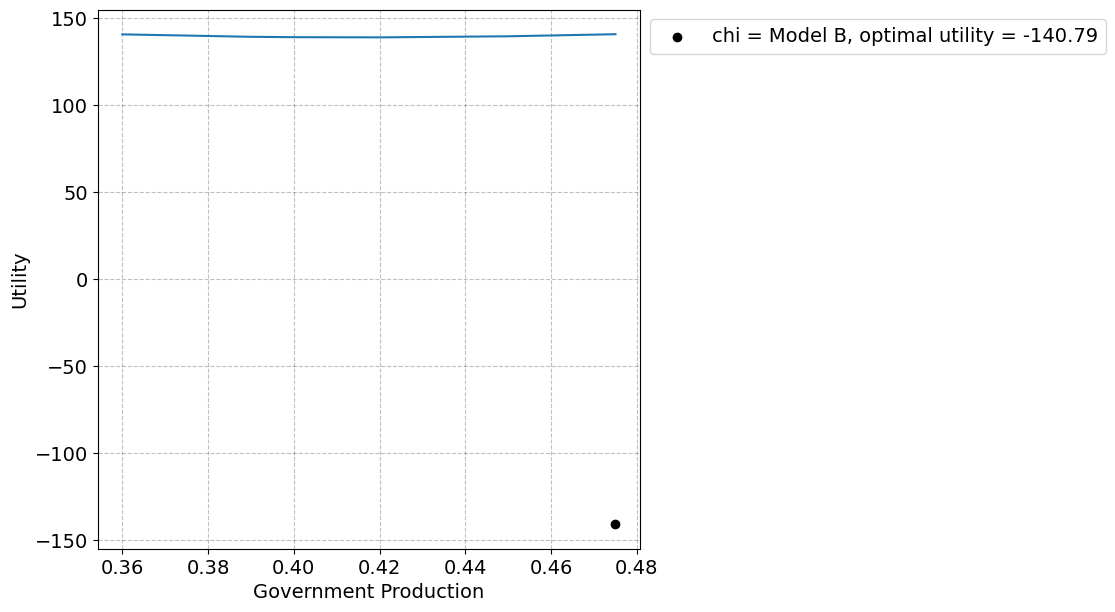

In [17]:
func.plot_chi(model, chi_results, new_output, chi0=True)


# C. Find optimal welfare policies II (with transfers)

**C.1: Optimal level $\chi$ an government production**

In [18]:
x0 =[0.4, -0.2]

result_c = optimize.minimize(func.u_gov_chi, x0, method='Nelder-Mead', args=model)

func.u_gov_chi(result_c.x, model)

ss_res['Model C'] = func.table_ss(model)
table_res['Model C'] = func.table_extra(result_c.x,model)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             7.7e-10
 C_hh             1.7e-11
 ELL_hh           6.8e-11
 L_hh             5.5e-11
 INC_hh           1.5e-11
 U_hh             1.4e-10
blocks.market_clearing
 L                5.5e-11
 I                2.2e-16
 clearing_A       7.7e-10 [target]
 clearing_L       5.5e-11
 clearing_Y       1.7e-11
 clearing_G       2.5e-11 [target]
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi      

**C.2: Plots**

In [19]:
#data 
chi_values = [-0.35, -0.2, -0.3, -0.25, -0.2, -0.22, -0.15, -0.1, -0.05, 0.0, 0.05]  # List of chi values to compute
opt_u_values = []

# Additional Chi values for plotting 
for chi in chi_values:
    chi_results[str(chi)] = func.calc_chi(chi, model, lists=True)

for i in chi_values:
        opt_u_values.append(chi_results[str(i)]['U_opt'])

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             7.6e-10
 C_hh             1.6e-11
 ELL_hh           6.0e-11
 L_hh             4.8e-11
 INC_hh           2.0e-11
 U_hh             1.2e-10
blocks.market_clearing
 L                4.8e-11
 I                2.2e-16
 clearing_A       6.1e-09 [target]
 clearing_L       4.8e-11
 clearing_Y       1.6e-11
 clearing_G       1.5e-09 [target]
clearing_L: terminal value is   0.00000002, but ss value is   0.00000000
clearing_Y: terminal value is  -0.00000002, but ss value is  -0.00000000
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
block

/Users/emmagundersen/Library/Mobile Documents/com~apple~CloudDocs/KU/9 semester/Het_assignments/Assignment_2/Assignment_II/steady_state.py:92: RuntimeWarning: invalid value encountered in double_scalars
  ss.Y = ss.Gamma_Y*ss.K**(par.alpha)*ss.L_Y**(1-par.alpha) # Total privat production


shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             1.1e-09
 C_hh             3.0e-11
 ELL_hh           1.5e-10
 L_hh             1.2e-10
 INC_hh           2.9e-12
 U_hh             3.4e-10
blocks.market_clearing
 L                1.2e-10
 I                0.0e+00
 clearing_A       1.1e-09 [target]
 clearing_L       1.2e-10
 clearing_Y       3.0e-11
 clearing_G       9.4e-11 [target]
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi      

Not exporting


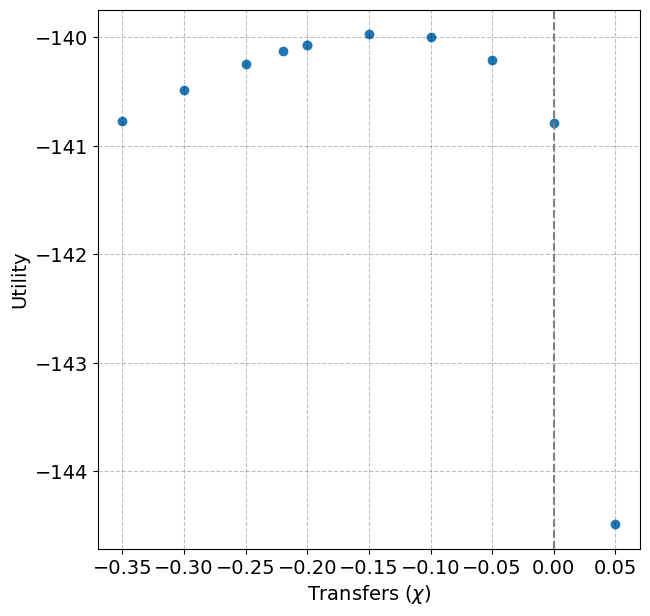

In [20]:
func.plot_chi_u(chi_values, opt_u_values, new_output)

Figure wil be added

# D. Increased TFP 

In [21]:
#Copy the steady state values
ini_ = model.ss.__dict__.copy()

model2 = deepcopy(model)
model2.par.G_ = 0.4653
model2.par.Chi_ = -0.2477

model2.par.Gamma_G_ = 1.0
model2.par.Gamma_Y_ = 1.1
model2.find_ss()

In [22]:
x0 =[0.4, -0.2]

result_d = optimize.minimize(func.u_gov_chi, x0, method='Nelder-Mead', args=model2)

func.u_gov_chi(result_d.x, model2)

ss_res['Model D'] = func.table_ss(model2)
table_res['Model D'] = func.table_extra(result_d.x,model2)

shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             8.2e-10
 C_hh             1.9e-11
 ELL_hh           6.3e-11
 L_hh             5.1e-11
 INC_hh           1.6e-11
 U_hh             1.3e-10
blocks.market_clearing
 L                5.1e-11
 I                2.2e-16
 clearing_A       8.2e-10 [target]
 clearing_L       5.1e-11
 clearing_Y       1.9e-11
 clearing_G       2.7e-11 [target]
shocks: G L_G Gamma_Y Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi      

# E. Transition Path 

In [23]:
table_res


{'Model B':                 Value
 Variable             
 Chi_val         0.000
 Gov_opt         0.415
 Gamma_Y         1.000
 U_opt        -138.968
 Y_G_relatio     0.340,
 'Model C':                 Value
 Variable             
 Chi_val        -0.218
 Gov_opt         0.444
 Gamma_Y         1.000
 U_opt        -136.889
 Y_G_relatio     0.318,
 'Model D':                 Value
 Variable             
 Chi_val        -0.248
 Gov_opt         0.465
 Gamma_Y         1.100
 U_opt        -128.840
 Y_G_relatio     0.311}

In [24]:
# a. define shock

# model3.find_transition_path(shocks=[], ini=ini_)

In [70]:

for t in range(plot_len): 
    dG[:] = (model2.ss.G - model.ss.G)

In [71]:
dG

array([-0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, -0.009744, -0.009744,
       -0.009744, -0.009744, -0.009744, -0.009744, 

In [77]:
# a. define shock
model3 = deepcopy(model2)

dG = np.zeros(par.T)

#for t in range(par.T_n):
#    dG[t] = (model2.ss.G - 0.465)**(-t)
for t in range(plot_len): 
    dG[:] = (model2.ss.G - model.ss.G)
#dG[:4] = -0.02

dL_G = np.zeros(par.T)
for t in range(plot_len): 
    dG[:] = (model2.ss.G - model.ss.G)
#dL_G[:4] = -0.02

shocks = {'dG':dG, 'dL_G' : dL_G} # note the 'd' for difference (in absolute terms)

model.find_transition_path(shocks=[])
model2.find_transition_path(shocks=[], ini=ini_)
model3.find_transition_path(shocks=shocks, ini=ini_)

S: terminal value is   0.45551200, but ss value is   0.46525600
U_hh: terminal value is  -5.19958643, but ss value is  -5.15360891


Text(0.5, 1.0, 'Private production')

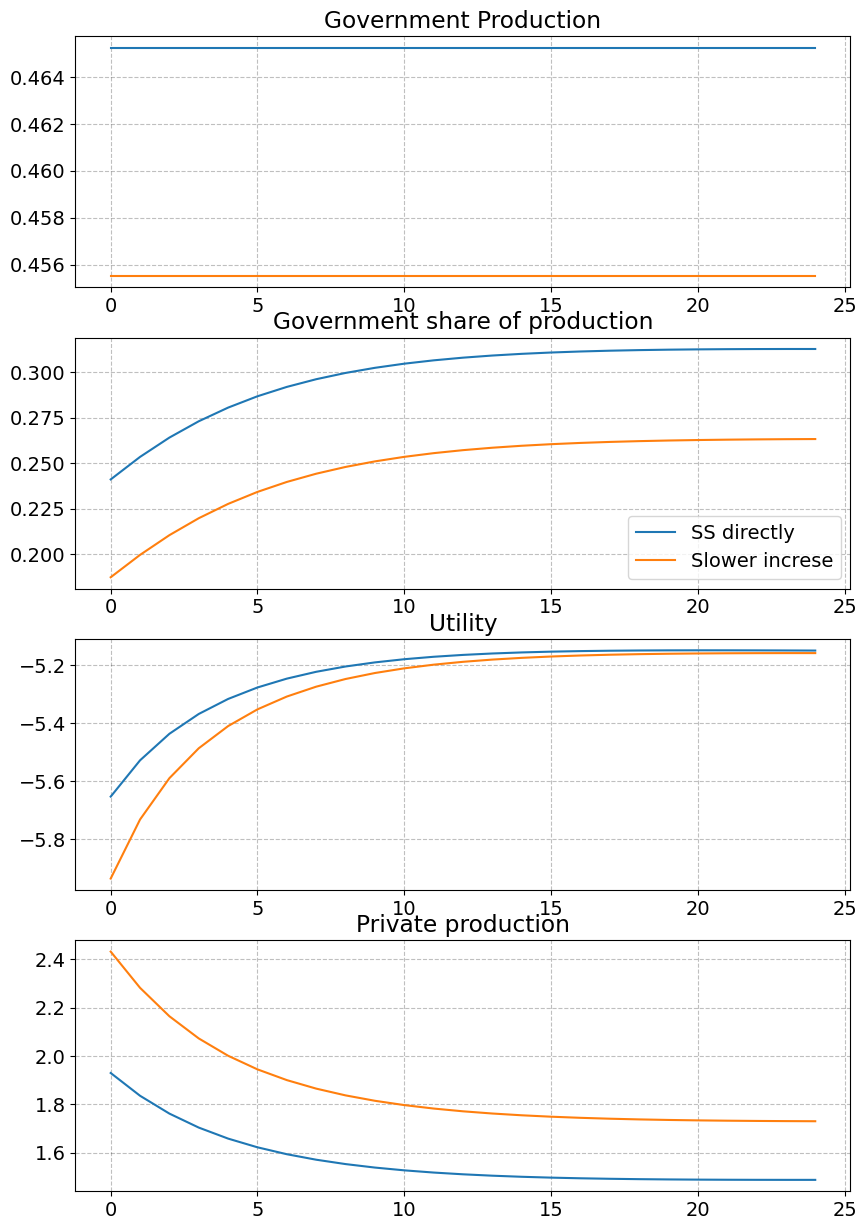

In [76]:
plot_len = 25

fig = plt.figure(figsize=(10, 15), dpi=100)

ax0 = fig.add_subplot(4,1,1)
ax0.plot(model2.path.G[:plot_len])
ax0.plot(model3.path.G[:plot_len])
ax0.set_title('Government Production')

ax1 = fig.add_subplot(4,1, 2)
model.plot(model.path.G)
ax1.plot(model2.path.G[:plot_len]/model2.path.Y[:plot_len], label = 'SS directly')
ax1.plot(model3.path.G[:plot_len]/model3.path.Y[:plot_len], label = 'Slower increse')

ax1.set_title('Government share of production')
ax1.legend()

ax2 = fig.add_subplot(4,1,3)
ax2.plot(model2.path.U_hh[:plot_len])
ax2.plot(model3.path.U_hh[:plot_len])
ax2.set_title('Utility')

ax3 = fig.add_subplot(4,1,4)
ax3.plot(model2.path.Y[:plot_len])
ax3.plot(model3.path.Y[:plot_len])

ax3.set_title('Private production')

## Output  

Dataframes

In [49]:
ss_df = pd.concat(ss_res.values(), axis=1, keys=ss_res.keys())
res_df = pd.concat(table_res.values(), axis=1, keys=ss_res.keys())

Exporting to latex

In [55]:
func.table_latex(ss_df, 'table_ss', new_output)
func.table_latex(res_df, 'table_res', new_output)

exporting
exporting
